<center><img src="img/pymor_logo.png" width="70%"></center>

# Model Order Reduction with pyMOR -- an Interactive Crash Course

## pyMOR School 2022
## Stephan Rave, Petar Mlinarić

# Outline

## What is pyMOR?

## Reduced Basis Methods with pyMOR

## System-Theoretic Methods with pyMOR

# What is pyMOR?

pyMOR is ...

- a software library for writing **M**odel **O**rder **R**eduction applications

- in the **py**thon programming language.

- BSD-licensed, fork us on [Github](https://github.com/pymor/pymor).

- Started 2012, 23k lines of code, 8k commits.

## Design Goals

> **Goal 1:** One library for algorithm development *and* large-scale applications.

- Small NumPy/SciPy-based discretization toolkit for easy prototyping.
- `VectorArray`, `Operator`, `Model` interfaces for seamless integration with high-performance PDE solvers.

> **Goal 2:** Unified view on MOR.

- Implement RB and system-theoretic methods in one common language.

## Implemented Algorithms

- Gram-Schmidt, POD, HAPOD.
- Greedy basis generation with different extension algorithms.
- Automatic (Petrov-)Galerkin projection of arbitrarily nested affine combinations of operators.
- Interpolation of arbitrary (nonlinear) operators, EI-Greedy, DEIM.
- A posteriori error estimation.
- System theory methods: balanced truncation, IRKA, ...
- Iterative linear solvers, eigenvalue computation, Newton algorithm, time-stepping algorithms.
- Non-intrusive MOR using artificial neural networks.
- **New!** Dynamic Mode Decomposition
- **New!** Discrete-time systems
- **New!** Structure preserving methods for symplectic models

## PDE Solvers

### Official Support:

- [deal.II](https://dealii.org)
- [FEniCS](https://fenicsproject.org)
- [NGSolve](https://ngsolve.org)
- [DUNE](https://dune-project.org)
- experimental support for [FEniCSx](https://fenicsproject.org) (see fenicsx branch)


### Used with:

- [BEST](https://www.itwm.fraunhofer.de/en/departments/sms/products-services/best-battery-electrochemistry-simulation-tool.html)
- [GridLOD](https://github.com/fredrikhellman/gridlod)
- [PoreChem](https://www.itwm.fraunhofer.de/en/departments/sms/products-services/porechem.html)
- file I/O, e.g. [COMSOL](https://comsol.com)
- ...

## pyMOR Development

### Main Developers
<table><tr>
<td><img src="img/balicki.png"></td>
<td><img src="img/fritze.jpg"></td>
<td><img src="img/mlinaric.jpeg"></td>
<td><img src="img/rave.jpg"></td>
<td><img src="img/schindler.png"></td>
</tr></table>

### Contributions
- everyone can/should(!) contribute (see talk on Friday)
- everyone can become main developer

## Installing pyMOR

### Installing pyMOR using pip
 
- minimal installation:
  
  ```
  pip3 install pymor
  ```

- all bells and whistles
  
  ```
  pip3 install pymor[full]  # needed for GUI
  pip3 install mpi4py  # requires C compiler / MPI headers
  pip3 install slycot  # requires Fortran / OpenBLAS headers
  ```
  
  [M.E.S.S.](https://www.mpi-magdeburg.mpg.de/projects/mess) (Matrix Equation Sparse Solver), `pip install pymess`

Using a [virtual environment](https://docs.python.org/3/tutorial/venv.html) is highly recommended.

### Installing pyMOR using conda


- all bells and whistles (windows)

  ```
  conda install -c conda-forge pymor
  conda install -c conda-forge slycot
  conda install -c pytorch pytorch  # no conda-forge package available
  ```
  
- all bells and whistles (linux)
  ```
  conda install -c conda-forge pymor
  conda install -c conda-forge slycot
  conda install -c conda-forge pytorch
  conda install -c conda-forge fenics  # not on windows
  ```
  
Avoid mixing [conda-forge](https://conda-forge.org) with other channels,
  
  ```
  conda config --set channel_priority strict 
  ```
  
and use a separate environment. (NGSolve is incompatible.)

### Using the docker container

```
docker pull pymor/demo:main
```

Comes with everything pre-installed, including FEniCS and NGSolve.

### Using our Binderhub
Go to

>  https://binderhub.uni-muenster.de/v2/gh/pymor/pymor/2021.1.0?token=ko5zhb3pn5ue4tbl

- Runs our docker image.
- Persistent storage during pyMOR School.
- Create your own directory and don't open other people's stuff!

## Hello pyMOR!

In [1]:
import pymor
pymor.config

/home/mp/Documents/pymor/internal_school_stuff/2022/lectures/pymor-intro/.venv/lib/python3.8/site-packages/pymor/core/config.py:49: UserWarning: dune-gdt bindings have been tested for version 2021.1.x (x >= 2) (installed: 2022.1.1.603).
  warnings.warn('dune-gdt bindings have been tested for version 2021.1.x (x >= 2) '
/home/mp/Documents/pymor/internal_school_stuff/2022/lectures/pymor-intro/.venv/lib/python3.8/site-packages/pymor/core/config.py:57: UserWarning: dune-gdt bindings have been tested for dune-xt 2021.1.x (x >= 2) (installed: 2022.1.4.601).
  warnings.warn('dune-gdt bindings have been tested for dune-xt 2021.1.x (x >= 2) '


pyMOR Version 2022.1.0

Python 3.8.13 on Linux-5.10.0-17-amd64-x86_64-with-glibc2.29

External Packages
--------------------------------
DEALII:      missing
DUNEGDT:     2022.1.1.603
FENICS:      missing
GL:          3.1.6
IPYTHON:     8.4.1
IPYWIDGETS:  7.7.1
MATPLOTLIB:  3.5.3
MESHIO:      5.3.4
MPI:         missing
NGSOLVE:     missing
NUMPY:       1.23.2
PYMESS:      missing
PYTEST:      7.1.2
PYTHREEJS:   missing
QT:          PySide2 (Qt 5.15.2)
QTOPENGL:    present
SCIKIT_FEM:  missing
SCIPY:       1.9.0
SCIPY_LSMR:  present
SLYCOT:      0.5.0
SPHINX:      5.1.1
TORCH:       1.12.1+cu102
TYPER:       0.6.1
VTKIO:       present

Defaults
--------
See pymor.core.defaults.print_defaults.

In [2]:
from pymor.basic import *
print_defaults()

00:02 |WARNING|_import_all: Failed to import pymor.discretizers.builtin.gui.jupyter.threejs
00:02 |WARNING|_import_all: Failed to import pymor.discretizers.fenics


                                pyMOR defaults                                 

path (shortened)                       value                             source
-------------------------------------  --------------------------------  ------
basic.almost_equal.atol                1e-14                             code  
basic.almost_equal.rtol                1e-14                             code  
dmd.dmd.svd_method                     'method_of_snapshots'             code  
genericsolvers.apply_inverse.check_fi  True                              code  
nite                                                                           
genericsolvers.apply_inverse.default_  'generic_least_squares_lsmr'      code  
least_squares_solver                                                           
genericsolvers.apply_inverse.default_  'generic_lgmres'                  code  
solver                                                                         
genericsolvers.solver_options.least_s  

## Subpackages of the pymor Package

|                                |                                                      |
| :-                             | :-                                                   |
| **`pymor.algorithms`**         | generic algorithms                                   |
| **`pymor.analyticalproblems`** | problem descriptions for use with discretizers       |
| `pymor.bindings`               | bindings to external solvers                         |
| `pymor.core`                   | base classes/caching/defaults/logging                |
| **`pymor.discretizers`**       | create `Models` from `analyticalproblems`            |
| **`pymor.models`**             | `Model` interface/implementations                    |
| **`pymor.operators`**          | `Operator` interface/constructions                   |
| `pymor.parallel`               | `WorkerPools` for parallelization                    |
| **`pymor.parameters`**         | parameter support/`ParameterFunctionals`             |
| **`pymor.reductors`**          | most MOR algorithms (rest in `pymor.algorithms`)     |
| `pymor.scripts`                | executable helper scripts for demos/visualization    |
| `pymor.tools`                  | non MOR-specific support code (pprint/floatcmp, ...) |
| **`pymor.vectorarrays`**       | `VectorArray` interface/implementations              |

## Getting help

- pyMOR's documentation can be found at

  > https://docs.pymor.org

- Be sure to read the [introduction](https://docs.pymor.org/2022-1-0/getting_started.html),
  the [technical overview](https://docs.pymor.org/2022-1-0/technical_overview.html) and
  the [tutorials](https://docs.pymor.org/2022-1-0/tutorials.html).

- Ask questions on

  > https://github.com/pymor/pymor/discussions

# Reduced Basis Methods with pyMOR

## Building the FOM

### The Thermal Block Problem

Solve:

\begin{align}
- \nabla \cdot [d(x, \mu) \nabla u(x, \mu)] &= f(x),  & x &\in \Omega,\\
                                  u(x, \mu) &= 0,     & x &\in \partial\Omega,
\end{align}

where

\begin{align}
d(x, \mu) &= \sum_{q=1}^Q \mathbb{1}_{\Omega_q}, \\
f(x)      &= 1.
\end{align}

satisfying $\overline{\Omega} = \overline{\dot{\bigcup}_{i=1}^{Q} \Omega_q}$.

### Setting up an analytical description of the thermal block problem

The thermal block problem already comes with pyMOR:

In [3]:
from pymor.basic import *
p = thermal_block_problem([2,2])

Our problem is parameterized:

In [4]:
p.parameters

Parameters({diffusion: 4})

### Looking at the definition

We can easily look at the definition of `p` by printing its `repr`:

In [5]:
p

StationaryProblem(
    RectDomain(domain=array([[0, 0], [1, 1]])),
    rhs=ConstantFunction(dim_domain=2),
    diffusion=LincombFunction(
                  (ExpressionFunction(
                       '(x[0] >= ix * dx) * (x[0] < (ix + 1) * dx) * (x[1] >= iy * dy) * (x[1] < (iy + 1) * dy) * 1.',
                       dim_domain=2,
                       values={ix: 0, iy: 0, dx: 0.5, dy: 0.5},
                       name='diffusion_0_0'),
                   ExpressionFunction(
                       '(x[0] >= ix * dx) * (x[1] >= iy * dy) * (x[1] < (iy + 1) * dy) * 1.',
                       dim_domain=2,
                       values={ix: 1, iy: 0, dx: 0.5, dy: 0.5},
                       name='diffusion_1_0'),
                   ExpressionFunction(
                       '(x[0] >= ix * dx) * (x[0] < (ix + 1) * dx) * (x[1] >= iy * dy) * 1.',
                       dim_domain=2,
                       values={ix: 0, iy: 1, dx: 0.5, dy: 0.5},
                       name='diffusion_0_1'

### Building a discrete model

We use the builtin discretizer `discretize_stationary_cg` to compute a finite-element discretization of the problem:

In [6]:
from pymor.basic import *
fom, data = discretize_stationary_cg(p, diameter=1/100)

00:02 DiffusionOperatorP1: Calculate gradients of shape functions transformed by reference map ...
00:02 DiffusionOperatorP1: Calculate all local scalar products between gradients ...
00:02 DiffusionOperatorP1: Determine global dofs ...
00:02 DiffusionOperatorP1: Boundary treatment ...
00:02 DiffusionOperatorP1: Assemble system matrix ...
00:02 DiffusionOperatorP1: Calculate gradients of shape functions transformed by reference map ...
00:02 DiffusionOperatorP1: Calculate all local scalar products between gradients ...
00:02 DiffusionOperatorP1: Determine global dofs ...
00:02 DiffusionOperatorP1: Boundary treatment ...
00:02 DiffusionOperatorP1: Assemble system matrix ...
00:02 DiffusionOperatorP1: Calculate gradients of shape functions transformed by reference map ...
00:03 DiffusionOperatorP1: Calculate all local scalar products between gradients ...
00:03 DiffusionOperatorP1: Determine global dofs ...
00:03 DiffusionOperatorP1: Boundary treatment ...
00:03 DiffusionOperatorP1: Asse

`fom` is a `Model`. It has the same `Parameters` as `p`:

In [7]:
fom.parameters

Parameters({diffusion: 4})

### Looking at the model

`fom` inherits its structure from `p`:

In [8]:
fom

StationaryModel(
    LincombOperator(
        (NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='boundary_part'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_0'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_1'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_2'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_3')),
        (1.0,
         ProjectionParameterFunctional('diffusion', size=4, index=0, name='diffusion_0_0'),
         ProjectionParameterFunctional('diffusion', size=4, index=1, name='diffusion_1_0'),
         ProjectionParameterFunctional('diffusion', size=4, index=2, name='diffusion_0_1'),
         ProjectionParameterFunctional('diffusion', size=4, inde

### Note

> Using an `analyticalproblem` and a `discretizer` is just one way
  to build the FOM.
  
> Everything that follows works the same for a FOM built using an external PDE solver.

### Solving the FOM

Remember the FOM's parameters:

In [9]:
fom.parameters

Parameters({diffusion: 4})

To `solve` the FOM, we need to specify values for those parameters:

In [10]:
U = fom.solve({'diffusion': [1., 0.01, 0.1, 1]})

00:03 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [1.0, 0.01, 0.1, 1.0], input: } ...


`U` is a `VectorArray`, an ordered collection of vectors of the same dimension:

In [11]:
U

NumpyVectorArray(
    NumpyVectorSpace(20201, id='STATE'),
    [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.57846167e-04
      2.33508510e-04 8.79461711e-05]],
    _len=1)

> There is not the notion of a single vector in pyMOR! Don't try to get hold of one!

### Some words about VectorArrays

Each `VectorArray` has a length, giving you the number of vectors:

In [12]:
len(U)

1

Its dimension gives you the *uniform* size of each vector in the array:

In [13]:
U.dim

20201

### Supported Operations:

|                  |                                                        |
| :-               | :-                                                     |
| `+`/`-`/`*`      | elementwise addition/subtraction/scalar multiplication |
| `inner`          | matrix of inner products between all vectors           |
| `pairwise_inner` | list of pairwise inner products                        |
| `lincomb`        | linear combination of the vectors in the array         |
| `scal`           | in-place scalar multiplication                         |
| `axpy`           | in-place BLAS axpy operation                           |
| `dofs`           | return some degrees of freedom as NumPy array          |
| `norm`           | list of norms                                          |
| `append`         | append vectors from another array                      |

### Playing a bit with VectorArrays

> All `VectorArrays` are created by their `VectorSpace`

In [14]:
V = fom.solution_space.empty()

Let's accumulate some solutions:

In [15]:
for mu in p.parameter_space.sample_randomly(10):
    V.append(fom.solve(mu))

00:03 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.4370861069626263, 0.9556428757689246, 0.7587945476302645, 0.6387926357773329], input: } ...
00:03 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.24041677639819287, 0.2403950683025824, 0.15227525095137953, 0.8795585311974417], input: } ...
00:03 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.6410035105688879, 0.737265320016441, 0.1185260448662222, 0.9729188669457949], input: } ...
00:04 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.8491983767203796, 0.29110519961044856, 0.26364247048639056, 0.2650640588680905], input: } ...
00:04 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.373818018663584, 0.5722807884690141, 0.48875051677790415, 0.36210622617823773], input: } ...
00:04 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.6506676052501416, 0.22554447458683766, 0.3629301836816964, 0.4297256589643226], input: } ...

In [16]:
# your code here ...

### Indexing
We can index a `VectorArray` using numbers, sequences of numbers, or slices, e.g.:

In [17]:
V_indexed = V[3:6]

Indexing **always** create a view on the original array:

In [18]:
print(V_indexed.is_view)
V_indexed *= 0
V.norm()

True


array([ 8.57053135, 18.88258356, 12.51902931,  0.        ,  0.        ,
        0.        , 11.50405509, 16.82955504, 10.03586733, 14.61341973])

### Looking at the solution

We can use the `visualize` method to plot the solution:

In [19]:
fom.visualize(U)

Output()

### Looking at the solution

An array with multiple elements is visualized as a time-series:

In [20]:
fom.visualize(V)

<pymor.discretizers.builtin.gui.jupyter.matplotlib.visualize_patch.<locals>.Plot at 0x7f861be5d400>

### Is the solution really a solution?

We compute the residual:

In [21]:
mu = fom.parameters.parse([1., 0.01, 0.1, 1])
U = fom.solve(mu)
(fom.operator.apply(U, mu=mu) - fom.rhs.as_vector(mu)).norm()

00:07 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [1.0, 0.01, 0.1, 1.0], input: } ...


array([4.93853524e-15])

> If you implement a `Model`, make sure that `solve` really returns solutions with zero residual!

### So how is `fom.rhs` defined?

Let's look at it:

In [22]:
fom.rhs

NumpyMatrixOperator(<20201x1 dense>, range_id='STATE')

What does `as_vector` do?

In [23]:
from pymor.tools.formatsrc import print_source
print_source(fom.rhs.as_vector)

def as_vector(self, mu=None):
        """Return a vector representation of a linear functional or vector operator.

        Depending on the operator's :attr:`~Operator.source` and
        :attr:`~Operator.range`, this method is equivalent to calling
        :meth:`~Operator.as_range_array` or :meth:`~Operator.as_source_array`
        respectively. The resulting |VectorArray| is required to have length 1.

        Parameters
        ----------
        mu
            The |parameter values| for which to return the vector representation.

        Returns
        -------
        V
            |VectorArray| of length 1 containing the vector representation.
        """
        if not self.linear:
            raise TypeError('This nonlinear operator does not represent a vector or linear functional.')
        if self.source.is_scalar:
            return self.as_range_array(mu)
        elif self.range.is_scalar:
            return self.as_source_array(mu)
        else:
            raise TypeError('This operator does not represent a vector or linear functional.')

## Reducing the FOM

### Building an approximation space

As before, we compute some random solution **snapshots** of the FOM, which will
span our **reduced** approximation space:

In [24]:
snapshots = fom.solution_space.empty()
for mu in p.parameter_space.sample_randomly(10):
    snapshots.append(fom.solve(mu))

00:08 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.20983441136030095, 0.5456592191001431, 0.13094966900369656, 0.9183883618709039], input: } ...
00:08 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.3329019834400152, 0.6962700559185838, 0.3805399684804699, 0.5680612190600297], input: } ...
00:08 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.5920392514089517, 0.26636900997297436, 0.9726261649881027, 0.7976195410250031], input: } ...
00:08 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.9455490474077702, 0.905344615384884, 0.6381099809299766, 0.9296868115208051], input: } ...
00:08 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.17964325184672755, 0.27638457617723067, 0.14070456001948428, 0.39279729768693794], input: } ...
00:08 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.4498095607205338, 0.34421412859650635, 0.8458637582367364, 0.4210779940242304], input: } .

It's a good idea, to orthonormalize the basis:

In [25]:
basis = gram_schmidt(snapshots)

00:09 gram_schmidt: Orthonormalizing vector 1 again
00:09 gram_schmidt: Orthonormalizing vector 2 again
00:09 gram_schmidt: Orthonormalizing vector 3 again
00:09 gram_schmidt: Orthonormalizing vector 4 again
00:09 gram_schmidt: Orthonormalizing vector 5 again
00:09 gram_schmidt: Orthonormalizing vector 6 again
00:09 gram_schmidt: Orthonormalizing vector 7 again
00:09 gram_schmidt: Orthonormalizing vector 8 again
00:09 gram_schmidt: Orthonormalizing vector 9 again


### Projecting the Model

In pyMOR, ROMs are built using a `Reductor`. Let's pick the most basic `Reductor`
available for a `StationaryModel`:

In [26]:
reductor = StationaryRBReductor(fom, basis)

Every reductor has a `reduce` method, which builds the ROM:

In [27]:
rom = reductor.reduce()

00:09 StationaryRBReductor: Operator projection ...
00:09 StationaryRBReductor: Building ROM ...


### Comparing ROM and FOM

In [28]:
fom

StationaryModel(
    LincombOperator(
        (NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='boundary_part'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_0'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_1'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_2'),
         NumpyMatrixOperator(<20201x20201 sparse, 140601 nnz>, source_id='STATE', range_id='STATE', name='diffusion_3')),
        (1.0,
         ProjectionParameterFunctional('diffusion', size=4, index=0, name='diffusion_0_0'),
         ProjectionParameterFunctional('diffusion', size=4, index=1, name='diffusion_1_0'),
         ProjectionParameterFunctional('diffusion', size=4, index=2, name='diffusion_0_1'),
         ProjectionParameterFunctional('diffusion', size=4, inde

In [29]:
rom

StationaryModel(
    LincombOperator(
        (NumpyMatrixOperator(<10x10 dense>, name='boundary_part'),
         NumpyMatrixOperator(<10x10 dense>, name='diffusion_0'),
         NumpyMatrixOperator(<10x10 dense>, name='diffusion_1'),
         NumpyMatrixOperator(<10x10 dense>, name='diffusion_2'),
         NumpyMatrixOperator(<10x10 dense>, name='diffusion_3')),
        (1.0,
         ProjectionParameterFunctional('diffusion', size=4, index=0, name='diffusion_0_0'),
         ProjectionParameterFunctional('diffusion', size=4, index=1, name='diffusion_1_0'),
         ProjectionParameterFunctional('diffusion', size=4, index=2, name='diffusion_0_1'),
         ProjectionParameterFunctional('diffusion', size=4, index=3, name='diffusion_1_1')),
        name='ellipticOperator'),
    NumpyMatrixOperator(<10x1 dense>),
    output_functional=ZeroOperator(NumpyVectorSpace(0), NumpyVectorSpace(10)),
    products={h1: NumpyMatrixOperator(<10x10 dense>),
              h1_semi: NumpyMatrixOperator(<1

### Solving the ROM

To solve the ROM, we just use `solve` again,

In [30]:
mu = fom.parameters.parse([1., 0.01, 0.1, 1])
u_rom = rom.solve(mu)

to get the reduced coefficients:

In [31]:
u_rom

NumpyVectorArray(
    NumpyVectorSpace(10),
    [[ 30.93256301  16.91363455  53.98890614   9.97899673  -9.27251948
      -16.50718606  -1.05610988   1.01033878   0.76104581   3.78690146]],
    _len=1)

A high-dimensional representation is obtained from the `reductor`:

In [32]:
U_rom = reductor.reconstruct(u_rom)

### Computing the MOR error

Let's compute the error:

In [33]:
U = fom.solve(mu)
ERR = U - U_rom
ERR.norm() / U.norm()

00:10 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [1.0, 0.01, 0.1, 1.0], input: } ...


array([0.1227483])

and look at it:

In [34]:
fom.visualize(ERR)

Output()

### Certified Reduced Basis Method

Let's use use a more sophisticated `reductor` which assembles an efficient
upper bound for the MOR error:

In [35]:
reductor = CoerciveRBReductor(
   fom,
   product=fom.h1_0_semi_product,
   coercivity_estimator=ExpressionParameterFunctional('min(diffusion)', fom.parameters)
)

and build a basis using a greedy search over the parameter space:

In [36]:
training_set = p.parameter_space.sample_uniformly(4)
print(training_set[0])

{diffusion: [0.1, 0.1, 0.1, 0.1]}


In [37]:
greedy_data = rb_greedy(fom, reductor, training_set, max_extensions=20)
print(greedy_data.keys())
rom = greedy_data['rom']

00:11 weak_greedy: Started greedy search on training set of size 256.
00:11 weak_greedy: Estimating errors ...
00:11 |   RBSurrogate: Reducing ...
00:11 |   |   CoerciveRBReductor: Operator projection ...
00:11 |   |   CoerciveRBReductor: Assembling error estimator ...
00:11 |   |   |   ResidualReductor: Estimating residual range ...
00:11 |   |   |   |   estimate_image_hierarchical: Estimating image for basis vector -1 ...
00:11 |   |   |   |   estimate_image_hierarchical: Orthonormalizing ...
00:11 |   |   |   ResidualReductor: Projecting residual operator ...
00:11 |   |   CoerciveRBReductor: Building ROM ...
00:11 weak_greedy: Maximum error after 0 extensions: 1.8745731821515565 (mu = {diffusion: [0.1, 0.1, 0.1, 0.1]})
00:11 weak_greedy: Extending surrogate for mu = {diffusion: [0.1, 0.1, 0.1, 0.1]} ...
00:11 |   RBSurrogate: Computing solution snapshot for mu = {diffusion: [0.1, 0.1, 0.1, 0.1]} ...
00:11 |   |   StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.1

00:13 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 17 again
00:13 |   |   |   |   |   gram_schmidt: Removing linearly dependent vector 18
00:13 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 19 again
00:13 |   |   |   |   |   gram_schmidt: Removing linearly dependent vector 20
00:13 |   |   |   ResidualReductor: Projecting residual operator ...
00:13 |   |   CoerciveRBReductor: Building ROM ...
      
00:13 weak_greedy: Estimating errors ...
00:13 weak_greedy: Maximum error after 5 extensions: 0.9452361443614147 (mu = {diffusion: [0.1, 0.1, 1.0, 1.0]})
00:13 weak_greedy: Extending surrogate for mu = {diffusion: [0.1, 0.1, 1.0, 1.0]} ...
00:13 |   RBSurrogate: Computing solution snapshot for mu = {diffusion: [0.1, 0.1, 1.0, 1.0]} ...
00:13 |   |   StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.1, 0.1, 1.0, 1.0], input: } ...
00:14 |   RBSurrogate: Extending basis with solution snapshot ...
00:14 |   |   gram_schmidt: Orthonormalizing vector 5

00:16 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 29 again
00:16 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 30 again
00:16 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 31 again
00:16 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 32 again
00:16 |   |   |   ResidualReductor: Projecting residual operator ...
00:16 |   |   CoerciveRBReductor: Building ROM ...
      
00:16 weak_greedy: Estimating errors ...
00:16 weak_greedy: Maximum error after 10 extensions: 0.23166496868164485 (mu = {diffusion: [1.0, 0.1, 1.0, 0.1]})
00:16 weak_greedy: Extending surrogate for mu = {diffusion: [1.0, 0.1, 1.0, 0.1]} ...
00:16 |   RBSurrogate: Computing solution snapshot for mu = {diffusion: [1.0, 0.1, 1.0, 0.1]} ...
00:16 |   |   StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [1.0, 0.1, 1.0, 0.1], input: } ...
00:16 |   RBSurrogate: Extending basis with solution snapshot ...
00:16 |   |   gram_schmidt: Orthonormalizing vector 10 again


00:19 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 49 again
00:19 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 50 again
00:19 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 51 again
00:19 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 52 again
00:19 |   |   |   ResidualReductor: Projecting residual operator ...
00:19 |   |   CoerciveRBReductor: Building ROM ...
      
00:19 weak_greedy: Estimating errors ...
00:20 weak_greedy: Maximum error after 15 extensions: 0.006326785453192256 (mu = {diffusion: [0.4, 0.1, 0.1, 1.0]})
00:20 weak_greedy: Extending surrogate for mu = {diffusion: [0.4, 0.1, 0.1, 1.0]} ...
00:20 |   RBSurrogate: Computing solution snapshot for mu = {diffusion: [0.4, 0.1, 0.1, 1.0]} ...
00:20 |   |   StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.4, 0.1, 0.1, 1.0], input: } ...
00:20 |   RBSurrogate: Extending basis with solution snapshot ...
00:20 |   |   gram_schmidt: Orthonormalizing vector 15 again

00:23 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 74 again
00:23 |   |   |   |   |   gram_schmidt: Orthonormalizing vector 75 again
00:23 |   |   |   ResidualReductor: Projecting residual operator ...
00:23 |   |   CoerciveRBReductor: Building ROM ...
      
00:23 weak_greedy: Maximum number of 20 extensions reached.
00:23 weak_greedy: Greedy search took 12.687672821999513 seconds


dict_keys(['max_errs', 'max_err_mus', 'extensions', 'time', 'rom'])


### Testing the ROM

Let's compute the error again:

In [38]:
mu = p.parameter_space.sample_randomly()
U = fom.solve(mu)
u_rom = rom.solve(mu)
ERR = U - reductor.reconstruct(u_rom)
ERR.norm(fom.h1_0_semi_product)

00:23 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.8767930832880342, 0.6609683141448022, 0.39780822236738433, 0.1572025152574213], input: } ...


array([1.54074869e-07])

and compare it with the estimated error:

In [39]:
rom.estimate_error(mu)

array([4.45386161e-07])

### Is it faster?

Finally, we compute some timings:

In [40]:
from time import perf_counter
mus = p.parameter_space.sample_randomly(10)
tic = perf_counter()
for mu in mus:
    fom.solve(mu)
t_fom = perf_counter() - tic
tic = perf_counter()
for mu in mus:
    rom.solve(mu)
t_rom = perf_counter() - tic
print(f'Speedup: {t_fom/t_rom}')

00:23 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.379884089544096, 0.3926649898240724, 0.7566455605042577, 0.6738017242196918], input: } ...
00:24 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.8984914683186939, 0.5249934326457544, 0.20763482134447153, 0.7419203085006955], input: } ...
00:24 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.7847065437552077, 0.6051494778125466, 0.7938704619591049, 0.5444160367279517], input: } ...
00:24 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.5704595464437947, 0.4847869165226947, 0.12287721406968567, 0.19710228429397403], input: } ...
00:24 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.12828626711806082, 0.6727693701374023, 0.382920382968694, 0.5577136220482325], input: } ...
00:24 StationaryModel: Solving ThermalBlock([2, 2])_CG for {diffusion: [0.9168098265334838, 0.32436300623398745, 0.4693446307320668, 0.7799960246887438], input: } ...
0

Speedup: 211.4658664988622


### Some things to try

- Plot the MOR error vs. the dimension of the reduced space.
 
- Plot the speedup vs. the dimension of the reduced space.

- Compute the maximum/minimum efficiency of the error estimator over the parameter space.

- Try different numbers of subdomains.

# System-Theoretic Methods with pyMOR

## Building the FOM

### Linear Time-Invariant (LTI) System

\begin{align}
  \dot{x}(t) & = A x(t) + B u(t), \quad x(0) = 0, \\
  y(t) & = C x(t),
\end{align}

- $u(t) \in \mathbb{R}^m$ is the input,
- $x(t) \in \mathbb{R}^n$ is the state,
- $y(t) \in \mathbb{R}^p$ is the output.

In [41]:
from pymor.basic import *
lti = LTIModel.from_mat_file('files/build.mat')

In [42]:
lti

LTIModel(
    NumpyMatrixOperator(<48x48 sparse, 1176 nnz>, source_id='STATE', range_id='STATE'),
    NumpyMatrixOperator(<48x1 dense>, range_id='STATE'),
    NumpyMatrixOperator(<1x48 dense>, source_id='STATE'),
    D=ZeroOperator(NumpyVectorSpace(1), NumpyVectorSpace(1)),
    E=IdentityOperator(NumpyVectorSpace(48, id='STATE')),
    presets={})

In [43]:
print(lti)

LTIModel
    class: LTIModel
    number of equations: 48
    number of inputs:    1
    number of outputs:   1
    continuous-time
    linear time-invariant
    solution_space:  NumpyVectorSpace(48, id='STATE')


### FOM Poles

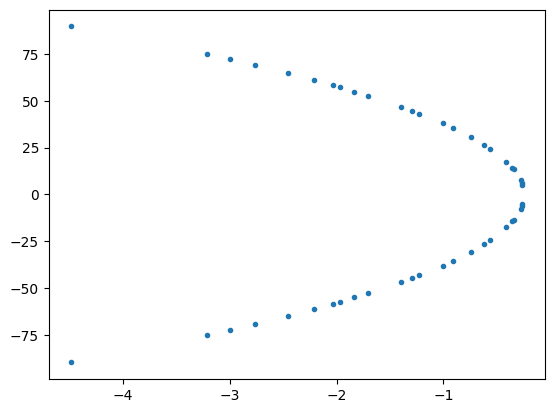

In [44]:
import matplotlib.pyplot as plt
poles = lti.poles()
_ = plt.plot(poles.real, poles.imag, '.')

### FOM Hankel Singular Values

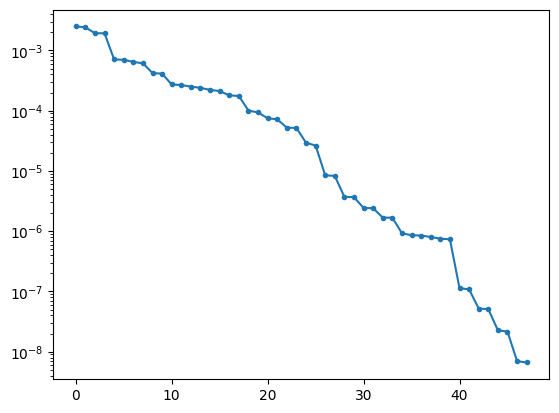

In [45]:
_ = plt.semilogy(lti.hsv(), '.-')

### FOM Bode Plot

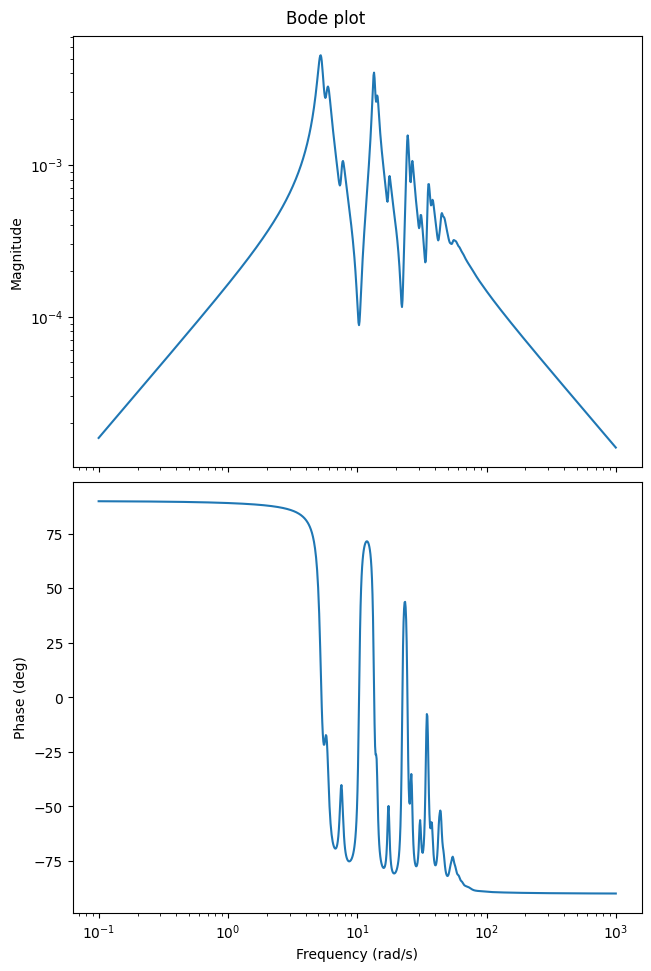

In [46]:
import numpy as np
w = np.logspace(-1, 3, 1000)
_ = lti.transfer_function.bode_plot(w)

### Balanced Truncation

In [47]:
bt = BTReductor(lti)

In [48]:
rom_bt = bt.reduce(4)

00:29 LTIPGReductor: Operator projection ...
00:29 LTIPGReductor: Building ROM ...


In [49]:
rom_bt

LTIModel(
    NumpyMatrixOperator(<4x4 dense>),
    NumpyMatrixOperator(<4x1 dense>),
    NumpyMatrixOperator(<1x4 dense>),
    D=ZeroOperator(NumpyVectorSpace(1), NumpyVectorSpace(1)),
    E=NumpyMatrixOperator(<4x4 dense>, name='IdentityOperator'),
    presets={},
    name='LTIModel_reduced')

In [50]:
print(rom_bt)

LTIModel_reduced
    class: LTIModel
    number of equations: 4
    number of inputs:    1
    number of outputs:   1
    continuous-time
    linear time-invariant
    solution_space:  NumpyVectorSpace(4)


### ROM poles

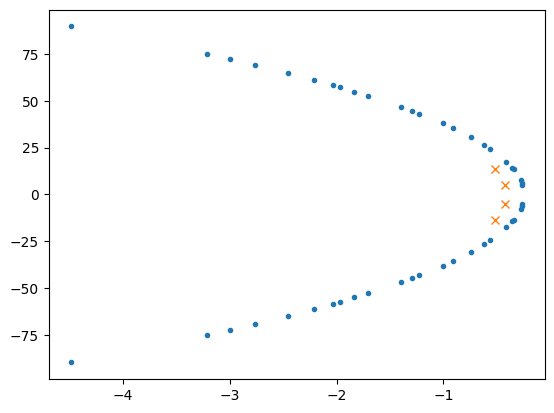

In [51]:
poles = lti.poles()
poles_rom = rom_bt.poles()
_ = plt.plot(poles.real, poles.imag, '.')
_ = plt.plot(poles_rom.real, poles_rom.imag, 'x')

### ROM Hankel Singular Values

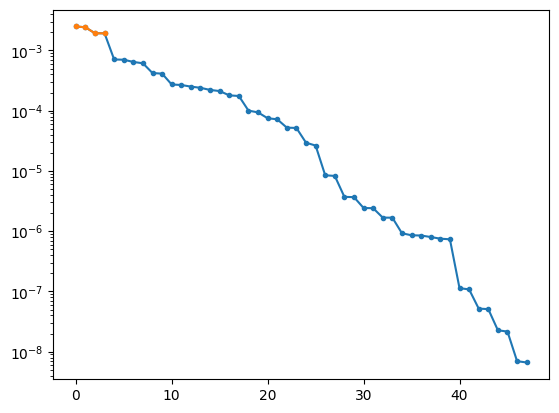

In [52]:
_ = plt.semilogy(lti.hsv(), '.-')
_ = plt.semilogy(rom_bt.hsv(), '.-')

### ROM Bode Plot

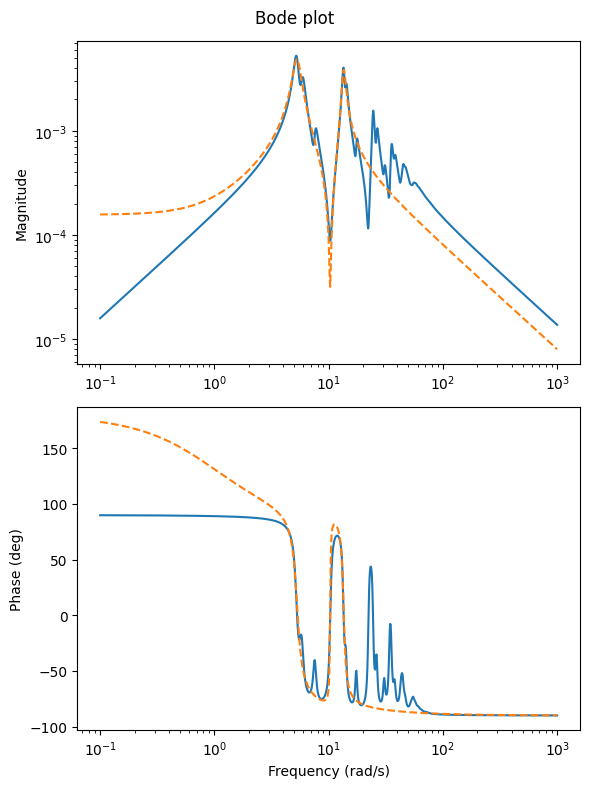

In [53]:
fig, ax = plt.subplots(2, 1, squeeze=False, figsize=(6, 8), tight_layout=True)
_ = lti.transfer_function.bode_plot(w, ax=ax)
_ = rom_bt.transfer_function.bode_plot(w, ax=ax, linestyle='--')

### Error Magnitude Plot

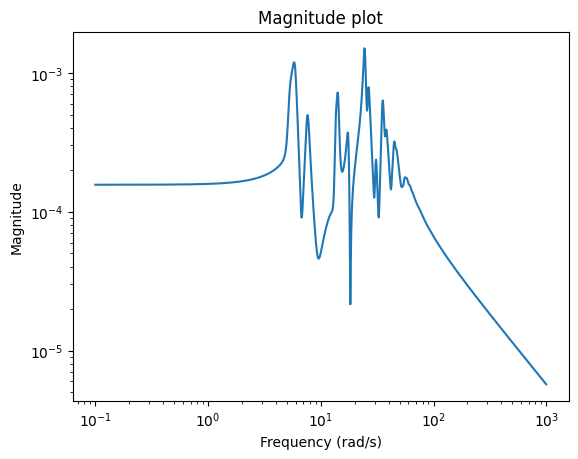

In [54]:
err_bt = lti - rom_bt
_ = err_bt.transfer_function.mag_plot(w)

### Relative Errors

In [55]:
print(err_bt.hinf_norm() / lti.hinf_norm())
print(err_bt.h2_norm() / lti.h2_norm())

0.28943618743594707
0.38049044485903444
